# Limpeza e Tratamento - NaBox

## Import

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ast

## Leituras

In [2]:
teste = pd.read_csv('teste.csv')
treino = pd.read_csv('treino.csv')
customers = pd.read_csv('customers_dataset.csv')
geolocation = pd.read_csv('geolocation_dataset.csv')
items = pd.read_csv('order_items_dataset.csv')
payments = pd.read_csv('order_payments_dataset.csv')
reviews = pd.read_csv('order_reviews.csv')
category = pd.read_csv('product_category_name_translation.csv')
products = pd.read_csv('products_dataset.csv')
sellers = pd.read_csv('sellers_dataset.csv')

## Teste

In [3]:
teste

,order_id,customer_id,order_purchase_timestamp,order_approved_at
0,4b30d547305dc914c94aaef8f842ebc2,665529d7b38b94e83d5ddf8efa19ca3b,2018-08-10 09:22:06,2018-08-10 09:35:19
1,bd18cc55469db99cfb36886d68bb3791,0bc6abbafdd2f89eb203507e7f1fc11d,2018-06-03 14:28:31,2018-06-03 14:50:01
2,37ec91b7248a28948cfedf05c2a82b15,0443dd75d52f59a5b0061b149534737e,2017-11-29 14:08:40,2017-11-29 14:29:50
3,317e2a850e41487363a134bb3369262b,634df8e0e275262ab76a3d15a07ddbac,2018-08-14 06:34:28,2018-08-14 06:45:10
4,eb1159e15cad602c36e16646e5662b85,d37306b60a0a5c64443841a857f15928,2018-04-19 09:35:17,2018-04-19 09:52:34
...,...,...,...,...
28934,5adb5eb1fe82008e15f6eca420111c7b,b459eb1f407840a2a6538926d141687c,2018-03-31 20:20:07,2018-03-31 20:35:10
28935,7a0698ce87fc4cd3e171e7361f0bc0b5,95b18ed2e0c4328d80daed9047b6d995,2018-06-20 12:39:18,2018-06-20 13:21:08
28936,223067157b61a8e20dc19cbafe40eff6,0a60413541d00d686cf4a7cd994cc1f2,2018-01-20 20:47:34,2018-01-23 03:36:43
28937,61898b3ad4d51459e014bc6d4c2e7166,a9b67ff10261665661f54c364e82d9b2,2018-06-10 15:44:20,2018-06-11 16:42:16


In [4]:
Nulos = teste[teste.isnull().any(axis=1)]
Nulos 


,order_id,customer_id,order_purchase_timestamp,order_approved_at


In [5]:
Duplicadas = teste[teste.duplicated()]
Duplicadas

,order_id,customer_id,order_purchase_timestamp,order_approved_at


## Treino

In [6]:
treino

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time (days),delivery_time_model (days)
0,b0e9288a209f5ec50391c140dba4c91f,e1ccb7645c1d9af9b91b6d521e0ba64a,delivered,2018-08-25 07:32:25,2018-08-25 07:45:08,2018-08-27 20:03:00,2018-08-30 21:16:34,5.57,19.69
1,c0e6116a3c6c2d732ec1b43bb7b5f307,b073fa2486ffea654bcd31968d03d8a1,delivered,2017-10-27 19:00:02,2017-10-27 19:15:19,2017-10-30 18:45:26,2017-11-01 19:32:24,5.02,12.21
2,3f484d19ccfa27aa339fac5775361ac9,a999fb2aea12464405c4f4d780ec2460,delivered,2018-05-06 15:17:31,2018-05-08 04:55:27,2018-05-08 14:12:00,2018-05-12 18:03:16,6.12,28.36
3,3f78779b80392a363a1763306be163b1,7bc5a3d6999652ec9851b05367159d3f,delivered,2018-01-23 18:19:38,2018-01-24 02:35:42,2018-01-25 17:55:38,2018-02-01 23:56:10,9.23,26.24
4,f192fe5e9b2eea0553f09566de94b5b6,e1b895b6ad2adfcbe4a314fcd073b344,delivered,2017-07-21 18:43:05,2017-07-21 18:55:09,2017-07-25 11:19:38,2017-07-26 16:55:36,4.93,12.22
...,...,...,...,...,...,...,...,...,...
67518,0d3a8a92f8bf8e1824f9460268920966,31e6809dc113df6b2a79119065ffa489,delivered,2017-11-27 12:32:41,2017-11-27 12:55:09,2017-11-30 16:51:42,2017-12-04 14:12:04,7.07,13.48
67519,77c75c0f9b0b1c5417b62c696c4734e5,e8b9bdf215893d907b9c19990c5abd23,delivered,2017-01-16 23:03:40,2017-01-16 23:15:08,2017-01-17 14:16:54,2017-01-24 17:06:00,7.75,44.04
67520,a4d50b937362e8e372a220a53489d59f,866abfca22fc51feacb9e9b1e8746632,delivered,2018-05-01 18:28:01,2018-05-01 18:54:08,2018-05-02 07:58:00,2018-05-11 02:05:27,9.32,27.23
67521,f810273bc84ceae52faa5a78522cd46d,6b8d7030c9c54921934afe7ec1cbe2e1,delivered,2018-02-22 17:06:07,2018-02-24 12:50:22,2018-02-27 20:21:42,2018-03-10 19:28:45,16.10,26.29


In [7]:
Nulos = treino[treino.isnull().any(axis=1)]
Nulos 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time (days),delivery_time_model (days)


In [8]:
Duplicadas = treino[treino.duplicated()]
Duplicadas

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time (days),delivery_time_model (days)


## Customers

In [9]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [10]:
Nulos = customers[customers.isnull().any(axis=1)]
Nulos 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [11]:
Duplicadas = customers[customers.duplicated()]
Duplicadas

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


## Geolocation

In [12]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [13]:
Nulos = geolocation[geolocation.isnull().any(axis=1)]
Nulos 

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [14]:
Duplicadas = geolocation[geolocation.duplicated()]
Duplicadas

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


Possuímos muitas linhas duplicadas. A partir disso, removeremos essas linhas para melhor organização

In [15]:
geolocation_cl=geolocation.drop_duplicates().reset_index(drop=True)
geolocation_cl



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
738327,99965,-28.180655,-52.034367,agua santa,RS
738328,99950,-28.072188,-52.011272,tapejara,RS
738329,99950,-28.068864,-52.012964,tapejara,RS
738330,99950,-28.068639,-52.010705,tapejara,RS


In [16]:
geolocation_cl = geolocation_cl.groupby('geolocation_zip_code_prefix', as_index=False).agg({'geolocation_lat': 'mean','geolocation_lng': 'mean'})
geolocation_cl


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550227,-46.634039
1,1002,-23.547657,-46.634991
2,1003,-23.549000,-46.635582
3,1004,-23.549829,-46.634792
4,1005,-23.549547,-46.636406
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343920,-51.874988
19013,99980,-28.389500,-51.843122


## Items

In [17]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [18]:
Nulos = items[items.isnull().any(axis=1)]
Nulos

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [19]:
Duplicadas = items[items.duplicated()]
Duplicadas

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


## Payments

In [20]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [21]:
Nulos = payments[payments.isnull().any(axis=1)]
Nulos 

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [22]:
Duplicadas = payments[payments.duplicated()]
Duplicadas

,order_id,payment_sequential,payment_type,payment_installments,payment_value


## Reviews

In [23]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
3,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
4,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
...,...,...,...,...,...,...,...
70322,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
70323,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
70324,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
70325,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Não analisaremos nulos, pois é aceitável ter elementos nulos nas linhas. 

In [24]:
Duplicadas = reviews[reviews.duplicated()]
Duplicadas

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


## Category

In [25]:
category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [26]:
Nulos = category[category.isnull().any(axis=1)]
Nulos 

,product_category_name,product_category_name_english


In [27]:
Duplicadas = category[category.duplicated()]
Duplicadas

,product_category_name,product_category_name_english


## Products

In [28]:
products = products.drop(["product_name_lenght","product_description_lenght","product_photos_qty"], axis=1)
products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,700.0,31.0,13.0,20.0


In [29]:
Nulos = products[products.isnull().any(axis=1)]
Nulos 

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,1300.0,45.0,16.0,45.0


As informações nulas não são relevantes, não exigindo, portanto, a remoção dessas linhas.

In [30]:
Duplicadas = products[products.duplicated()]
Duplicadas

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm


## Sellers

In [31]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [32]:
Nulos = sellers[sellers.isnull().any(axis=1)]
Nulos 

,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [33]:
Duplicadas = sellers[sellers.duplicated()]
Duplicadas

,seller_id,seller_zip_code_prefix,seller_city,seller_state


## Merge

Cópia da tabela de geolocation (uma para seller e outra para customer):

In [34]:
geo_seller = geolocation_cl[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']].rename(columns={'geolocation_zip_code_prefix': 'seller_zip_code_prefix','geolocation_lat': 'seller_latitude', 'geolocation_lng': 'seller_longitude'})

geo_customer = geolocation_cl[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']].rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix','geolocation_lat': 'customer_latitude','geolocation_lng': 'customer_longitude'})



In [35]:
df = pd.merge(items, products, on='product_id', how='inner')
df.drop(['order_item_id'], axis=1)
df = pd.merge(df, sellers, on='seller_id', how="inner")
df = pd.merge(df, payments, on='order_id', how='inner')
df = pd.merge(df, treino, on='order_id', how='inner')
df = pd.merge(df, customers, on='customer_id', how='inner')
df = pd.merge(df, geo_customer,on='customer_zip_code_prefix',how='inner')
df = pd.merge(df, geo_seller,on='seller_zip_code_prefix',how='inner')
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,...,delivery_time (days),delivery_time_model (days),customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_latitude,customer_longitude,seller_latitude,seller_longitude
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,28.0,...,7.61,15.63,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.763186,-41.310265,-22.497188,-44.127324
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,50.0,...,16.22,18.55,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.222506,-50.898951,-23.565754,-46.519097
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,3050.0,33.0,...,7.95,21.39,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.869998,-44.593059,-22.262802,-46.170735
3,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,utilidades_domesticas,450.0,24.0,...,6.67,21.10,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,-19.739990,-47.924643,-21.189922,-47.787945
4,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,telefonia,200.0,27.0,...,8.42,24.50,635d9ac1680f03288e72ada3a1035803,16700,guararapes,SP,-21.250677,-50.646525,-23.539639,-46.632154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80088,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,casa_construcao,1050.0,16.0,...,16.35,33.61,ecc3d4eb9b17d2f0865d21f2abecc51c,39401,montes claros,MG,-16.723207,-43.872060,-23.191718,-47.290079
80089,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,10150.0,89.0,...,17.37,24.42,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,-2.499937,-44.295904,-26.912506,-48.674090
80090,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,8950.0,45.0,...,9.42,17.56,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,-25.582933,-49.313298,-23.535839,-46.642848
80091,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,967.0,21.0,...,4.80,17.29,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,-23.597320,-46.643843,-25.469563,-49.288176


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80093 entries, 0 to 80092
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       80093 non-null  object 
 1   order_item_id                  80093 non-null  int64  
 2   product_id                     80093 non-null  object 
 3   seller_id                      80093 non-null  object 
 4   shipping_limit_date            80093 non-null  object 
 5   price                          80093 non-null  float64
 6   freight_value                  80093 non-null  float64
 7   product_category_name          78938 non-null  object 
 8   product_weight_g               80083 non-null  float64
 9   product_length_cm              80083 non-null  float64
 10  product_height_cm              80083 non-null  float64
 11  product_width_cm               80083 non-null  float64
 12  seller_zip_code_prefix         80093 non-null 

## Análises


<Axes: >

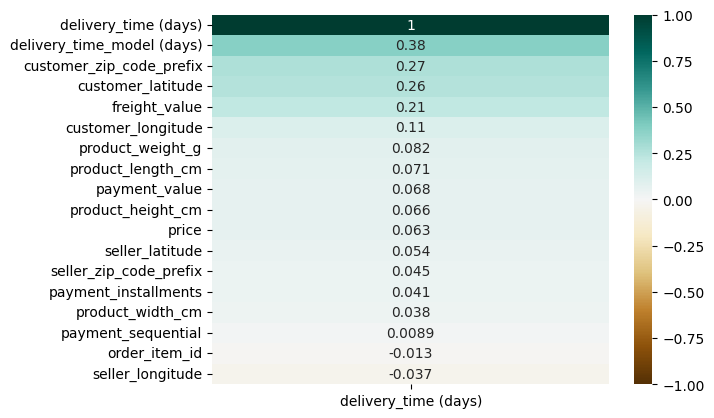

In [37]:
df_num = df.select_dtypes(include=['number'])
corr = df_num.corr()

delivery_time_corr = corr[['delivery_time (days)']].sort_values(by='delivery_time (days)', ascending=False)

sns.heatmap(delivery_time_corr, 
            annot=True,                 
            vmin=-1, vmax=1,           
            cmap='BrBG')



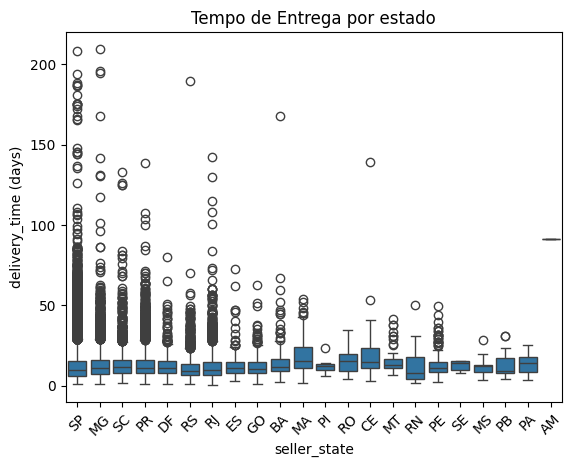

In [38]:
sns.boxplot(data=df, x='seller_state', y='delivery_time (days)')
plt.title('Tempo de Entrega por estado')
plt.xticks(rotation=45)
plt.show()

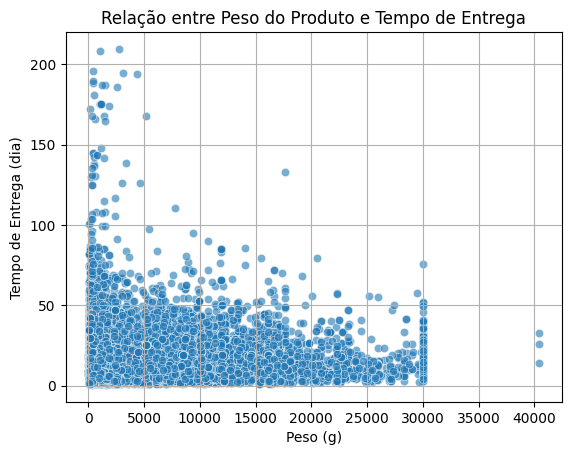

In [39]:
sns.scatterplot(data=df, x='product_weight_g', y='delivery_time (days)', alpha=0.6)
plt.title('Relação entre Peso do Produto e Tempo de Entrega')
plt.xlabel('Peso (g)')
plt.ylabel('Tempo de Entrega (dia)')
plt.grid(True)
plt.show()

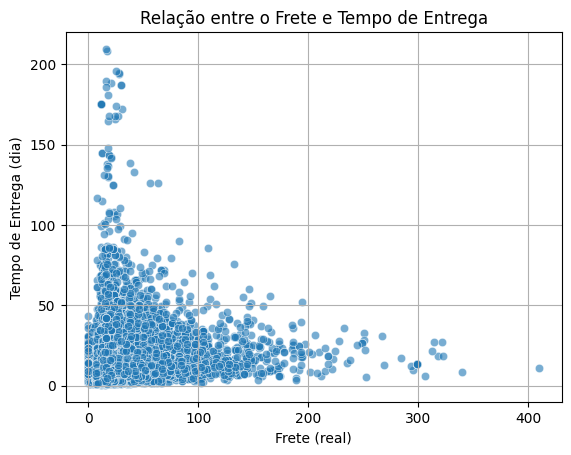

In [42]:
sns.scatterplot(data=df, x='freight_value', y='delivery_time (days)', alpha=0.6)
plt.title('Relação entre o Frete e Tempo de Entrega')
plt.xlabel('Frete (real)')
plt.ylabel('Tempo de Entrega (dia)')
plt.grid(True)
plt.show()